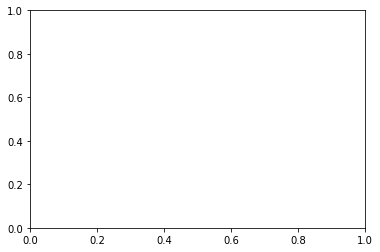

In [1]:
import sys
sys.path.insert(0, '../')

import numpy as np
from utils.Config import Config 
from registrationNN.models import NNModel, model_visualizer
from utils.ObjectUtil import ObjectUtil
from sklearn.model_selection import train_test_split
import os
from munch import Munch
import time
import random
import json 
import sys
import matplotlib.pyplot as plt
from utils.RegistrationUtils import RegistrationUtils
from animator.SketchAnimation import SketchAnimation

In [2]:
%load_ext autoreload

%autoreload 2
%matplotlib notebook

In [3]:
exp_id = 'test_on_triangles_5'

model_config = Config.default_model_config(exp_id)
model_config.learning_rate = 1e-2
model_config.re_sampling = 50
model_config.n_files = 100
model_config.k_select = 10
model_config.epochs = 500
model_config.comment = 'no penalty on the movements'
model_config.select_only_matched = True
# model_config.obj_accepted_labels = ['Triangle', 'Circle', 'Star']
model_config.redirect_out = False

model_config.load = False
model_config.load_ckpt = False
model_config.save = True
model_config.save_ckpt = True
model_config.vis_transformation = False
model_config.num_vis_samples = 5
 
print(f"[RegisterationMLP.py] {time.ctime()}: Expermint {model_config.exp_id} started")

org_objs, tar_objs = [], []
objs, labels = ObjectUtil.extract_objects_from_directory(model_config.dataset_path,
                                                        n_files=model_config.n_files,
                                                        acceptable_labels=model_config.obj_accepted_labels,
                                                        re_sampling = model_config.re_sampling)
labels, objs = np.asarray(labels), np.asarray(objs)

# validate that objects are distincts 
tot = 0
for obj1 in objs:
    for obj2 in objs:
        if obj1 == obj2:
            tot += 1

print(len(objs), tot)

random.seed(model_config.seed)
val_inds = np.random.choice(np.arange(len(objs)), int(0.1 * len(objs)), replace=False)
trn_inds = np.array([x for x in range(len(objs)) if x not in val_inds])

train_org_sketches, val_org_sketches, train_tar_sketches, val_tar_sketches  = [], [], [], []
tmp_objs, tmp_labels = objs[trn_inds], labels[trn_inds]
for obj, lbl in zip(tmp_objs, tmp_labels):
    if model_config.select_only_matched:
        matched_objs = tmp_objs[tmp_labels == lbl] # TODO test with non-matched objects
    else:
        matched_objs = tmp_objs[trn_inds]

    # choose k random matched objects
    matched_objs = random.choices(matched_objs, k=model_config.k_select)

    for obj2 in matched_objs:
        train_org_sketches.append(obj)
        train_tar_sketches.append(obj2)


tmp_objs, tmp_labels = objs[val_inds], labels[val_inds]
for obj, lbl in zip(tmp_objs, tmp_labels):
    if model_config.select_only_matched:
        matched_objs = tmp_objs[tmp_labels == lbl] # TODO test with non-matched objects
    else:
        matched_objs = tmp_objs[trn_inds]

    # choose k random matched objects
    matched_objs = random.choices(matched_objs, k=model_config.k_select)

    for obj2 in matched_objs:
        val_org_sketches.append(obj)
        val_tar_sketches.append(obj2)




# split train test
# train_org_sketches, val_org_sketches, train_tar_sketches, val_tar_sketches = train_test_split(org_objs, tar_objs, random_state=model_config.seed, test_size=0.2)



[RegisterationMLP.py] Tue Sep  7 05:30:07 2021: Expermint test_on_triangles_5 started
51 71


In [4]:
# prepare model
model_config.epochs = 500
model_config.learning_rate = 1e-4
model_config.decay_rate = model_config.learning_rate/model_config.epochs
model_config.batch_size=32
model = NNModel(model_config)

Devices: [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12403549211106884716
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 31593899008
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12044809180409255141
physical_device_desc: "device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0"
]
length of original sketchs:460
[models.py] Tue Sep  7 05:30:14 2021: finshed loading the data
Epoch 1/700
29/29 [==============================] - 12s 127ms/step - loss: 39.7949

Epoch 00001: loss improved from inf to 25.68014, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 2/700
29/29 [==============================] - 0s 17ms/step - loss: 14.3869

Epoch 00002: loss improved from 25.68014 to 14.06953, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 3/700
29/29 [==============================] - 0s 17ms/step - loss: 13.8692

Epo

29/29 [==============================] - 0s 13ms/step - loss: 7.8937

Epoch 00044: loss did not improve from 7.91436
Epoch 45/700
29/29 [==============================] - 0s 14ms/step - loss: 7.8362

Epoch 00045: loss improved from 7.91436 to 7.77709, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 46/700
29/29 [==============================] - 0s 14ms/step - loss: 7.6794

Epoch 00046: loss improved from 7.77709 to 7.74951, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 47/700
29/29 [==============================] - 0s 14ms/step - loss: 7.6802

Epoch 00047: loss did not improve from 7.74951
Epoch 48/700
29/29 [==============================] - 0s 14ms/step - loss: 7.6583

Epoch 00048: loss improved from 7.74951 to 7.64245, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 49/700
29/29 [==============================] - 0s 14ms/step - loss: 7.4225

Epoch 0004

29/29 [==============================] - 0s 16ms/step - loss: 6.3685

Epoch 00092: loss improved from 6.21345 to 6.16530, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 93/700
29/29 [==============================] - 0s 13ms/step - loss: 6.2529

Epoch 00093: loss did not improve from 6.16530
Epoch 94/700
29/29 [==============================] - 0s 16ms/step - loss: 6.2140

Epoch 00094: loss did not improve from 6.16530
Epoch 95/700
29/29 [==============================] - 1s 19ms/step - loss: 6.2164

Epoch 00095: loss did not improve from 6.16530
Epoch 96/700
29/29 [==============================] - 0s 14ms/step - loss: 6.3398

Epoch 00096: loss improved from 6.16530 to 6.15932, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 97/700
29/29 [==============================] - 0s 14ms/step - loss: 6.1361

Epoch 00097: loss did not improve from 6.15932
Epoch 98/700
29/29 [==============================] -

Epoch 144/700
29/29 [==============================] - 0s 12ms/step - loss: 5.7221

Epoch 00144: loss did not improve from 5.54215
Epoch 145/700
29/29 [==============================] - 0s 14ms/step - loss: 5.6758

Epoch 00145: loss did not improve from 5.54215
Epoch 146/700
29/29 [==============================] - 0s 14ms/step - loss: 5.7657

Epoch 00146: loss did not improve from 5.54215
Epoch 147/700
29/29 [==============================] - 0s 13ms/step - loss: 5.5460

Epoch 00147: loss improved from 5.54215 to 5.50535, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 148/700
29/29 [==============================] - 0s 13ms/step - loss: 5.5472

Epoch 00148: loss improved from 5.50535 to 5.48893, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 149/700
29/29 [==============================] - 0s 15ms/step - loss: 5.4994

Epoch 00149: loss did not improve from 5.48893
Epoch 150/700
29/29 [=============

29/29 [==============================] - 0s 16ms/step - loss: 5.1113

Epoch 00202: loss improved from 5.15322 to 5.14825, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 203/700
29/29 [==============================] - 0s 16ms/step - loss: 5.1627

Epoch 00203: loss did not improve from 5.14825
Epoch 204/700
29/29 [==============================] - 0s 17ms/step - loss: 5.0597

Epoch 00204: loss improved from 5.14825 to 5.13606, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 205/700
29/29 [==============================] - 0s 16ms/step - loss: 5.3051

Epoch 00205: loss did not improve from 5.13606
Epoch 206/700
29/29 [==============================] - 0s 13ms/step - loss: 5.0670

Epoch 00206: loss did not improve from 5.13606
Epoch 207/700
29/29 [==============================] - 0s 14ms/step - loss: 5.3111

Epoch 00207: loss did not improve from 5.13606
Epoch 208/700
29/29 [===========================

29/29 [==============================] - 0s 15ms/step - loss: 5.2623

Epoch 00259: loss did not improve from 4.92846
Epoch 260/700
29/29 [==============================] - 0s 15ms/step - loss: 5.1110

Epoch 00260: loss did not improve from 4.92846
Epoch 261/700
29/29 [==============================] - 0s 15ms/step - loss: 5.0572

Epoch 00261: loss did not improve from 4.92846
Epoch 262/700
29/29 [==============================] - 0s 16ms/step - loss: 4.8977

Epoch 00262: loss improved from 4.92846 to 4.91886, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 263/700
29/29 [==============================] - 0s 16ms/step - loss: 4.9278

Epoch 00263: loss did not improve from 4.91886
Epoch 264/700
29/29 [==============================] - 1s 18ms/step - loss: 5.0742

Epoch 00264: loss did not improve from 4.91886
Epoch 265/700
29/29 [==============================] - 0s 16ms/step - loss: 5.0429

Epoch 00265: loss did not improve from 4.91886
Epoch 2

29/29 [==============================] - 0s 14ms/step - loss: 4.9693

Epoch 00316: loss did not improve from 4.79070
Epoch 317/700
29/29 [==============================] - 0s 13ms/step - loss: 4.9138

Epoch 00317: loss did not improve from 4.79070
Epoch 318/700
29/29 [==============================] - 1s 22ms/step - loss: 5.1051

Epoch 00318: loss did not improve from 4.79070
Epoch 319/700
29/29 [==============================] - 0s 17ms/step - loss: 4.9040

Epoch 00319: loss did not improve from 4.79070
Epoch 320/700
29/29 [==============================] - 0s 15ms/step - loss: 4.9208

Epoch 00320: loss did not improve from 4.79070
Epoch 321/700
29/29 [==============================] - 0s 13ms/step - loss: 4.7790

Epoch 00321: loss did not improve from 4.79070
Epoch 322/700
29/29 [==============================] - 0s 13ms/step - loss: 4.8206

Epoch 00322: loss did not improve from 4.79070
Epoch 323/700
29/29 [==============================] - 0s 15ms/step - loss: 4.8774

Epoch 00323: 

29/29 [==============================] - 0s 13ms/step - loss: 4.7472

Epoch 00376: loss did not improve from 4.61031
Epoch 377/700
29/29 [==============================] - 0s 13ms/step - loss: 4.7630

Epoch 00377: loss did not improve from 4.61031
Epoch 378/700
29/29 [==============================] - 0s 13ms/step - loss: 4.6176

Epoch 00378: loss did not improve from 4.61031
Epoch 379/700
29/29 [==============================] - 0s 14ms/step - loss: 4.7716

Epoch 00379: loss did not improve from 4.61031
Epoch 380/700
29/29 [==============================] - 0s 13ms/step - loss: 4.7069

Epoch 00380: loss did not improve from 4.61031
Epoch 381/700
29/29 [==============================] - 0s 13ms/step - loss: 4.6285

Epoch 00381: loss did not improve from 4.61031
Epoch 382/700
29/29 [==============================] - 0s 14ms/step - loss: 4.8530

Epoch 00382: loss did not improve from 4.61031
Epoch 383/700
29/29 [==============================] - 0s 13ms/step - loss: 4.6466

Epoch 00383: 

29/29 [==============================] - 0s 14ms/step - loss: 4.6160

Epoch 00434: loss did not improve from 4.50435
Epoch 435/700
29/29 [==============================] - 0s 13ms/step - loss: 4.4936

Epoch 00435: loss improved from 4.50435 to 4.47761, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 436/700
29/29 [==============================] - 0s 14ms/step - loss: 4.7310

Epoch 00436: loss did not improve from 4.47761
Epoch 437/700
29/29 [==============================] - 0s 13ms/step - loss: 4.6329

Epoch 00437: loss did not improve from 4.47761
Epoch 438/700
29/29 [==============================] - 0s 14ms/step - loss: 4.7026

Epoch 00438: loss did not improve from 4.47761
Epoch 439/700
29/29 [==============================] - 0s 15ms/step - loss: 4.5650

Epoch 00439: loss did not improve from 4.47761
Epoch 440/700
29/29 [==============================] - 0s 14ms/step - loss: 4.5145

Epoch 00440: loss did not improve from 4.47761
Epoch 4

29/29 [==============================] - 0s 15ms/step - loss: 4.4106

Epoch 00492: loss did not improve from 4.32694
Epoch 493/700
29/29 [==============================] - 0s 13ms/step - loss: 4.3445

Epoch 00493: loss did not improve from 4.32694
Epoch 494/700
29/29 [==============================] - 0s 14ms/step - loss: 4.6215

Epoch 00494: loss did not improve from 4.32694
Epoch 495/700
29/29 [==============================] - 0s 14ms/step - loss: 4.3904

Epoch 00495: loss did not improve from 4.32694
Epoch 496/700
29/29 [==============================] - 0s 15ms/step - loss: 4.5163

Epoch 00496: loss did not improve from 4.32694
Epoch 497/700
29/29 [==============================] - 0s 15ms/step - loss: 4.3015

Epoch 00497: loss improved from 4.32694 to 4.30621, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 498/700
29/29 [==============================] - 0s 15ms/step - loss: 4.2285

Epoch 00498: loss did not improve from 4.30621
Epoch 4

29/29 [==============================] - 0s 15ms/step - loss: 4.2702

Epoch 00549: loss did not improve from 4.21115
Epoch 550/700
29/29 [==============================] - 0s 14ms/step - loss: 4.2020

Epoch 00550: loss improved from 4.21115 to 4.19602, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 551/700
29/29 [==============================] - 0s 14ms/step - loss: 4.2623

Epoch 00551: loss did not improve from 4.19602
Epoch 552/700
29/29 [==============================] - 0s 15ms/step - loss: 4.3402

Epoch 00552: loss did not improve from 4.19602
Epoch 553/700
29/29 [==============================] - 0s 14ms/step - loss: 4.1937

Epoch 00553: loss did not improve from 4.19602
Epoch 554/700
29/29 [==============================] - 0s 14ms/step - loss: 4.2271

Epoch 00554: loss did not improve from 4.19602
Epoch 555/700
29/29 [==============================] - 0s 14ms/step - loss: 4.2281

Epoch 00555: loss did not improve from 4.19602
Epoch 5

29/29 [==============================] - 0s 15ms/step - loss: 4.1110

Epoch 00607: loss did not improve from 4.05356
Epoch 608/700
29/29 [==============================] - 0s 13ms/step - loss: 4.1648

Epoch 00608: loss did not improve from 4.05356
Epoch 609/700
29/29 [==============================] - 1s 18ms/step - loss: 4.1347

Epoch 00609: loss did not improve from 4.05356
Epoch 610/700
29/29 [==============================] - 0s 16ms/step - loss: 4.2657

Epoch 00610: loss did not improve from 4.05356
Epoch 611/700
29/29 [==============================] - 0s 13ms/step - loss: 4.1185

Epoch 00611: loss improved from 4.05356 to 4.03759, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 612/700
29/29 [==============================] - 0s 14ms/step - loss: 4.0956

Epoch 00612: loss did not improve from 4.03759
Epoch 613/700
29/29 [==============================] - 0s 13ms/step - loss: 4.0181

Epoch 00613: loss did not improve from 4.03759
Epoch 6

29/29 [==============================] - 0s 13ms/step - loss: 4.0923

Epoch 00666: loss did not improve from 3.98977
Epoch 667/700
29/29 [==============================] - 0s 13ms/step - loss: 4.3157

Epoch 00667: loss did not improve from 3.98977
Epoch 668/700
29/29 [==============================] - 0s 14ms/step - loss: 3.9599

Epoch 00668: loss did not improve from 3.98977
Epoch 669/700
29/29 [==============================] - 0s 13ms/step - loss: 3.9356

Epoch 00669: loss did not improve from 3.98977
Epoch 670/700
29/29 [==============================] - 0s 15ms/step - loss: 4.0578

Epoch 00670: loss did not improve from 3.98977
Epoch 671/700
29/29 [==============================] - 0s 14ms/step - loss: 3.9191

Epoch 00671: loss improved from 3.98977 to 3.98228, saving model to ../registrationNN/saved_models/test_on_triangles_5/cp-best-loss.ckpt
Epoch 672/700
29/29 [==============================] - 0s 13ms/step - loss: 3.9559

Epoch 00672: loss improved from 3.98228 to 3.96176, sa

<IPython.core.display.Javascript object>


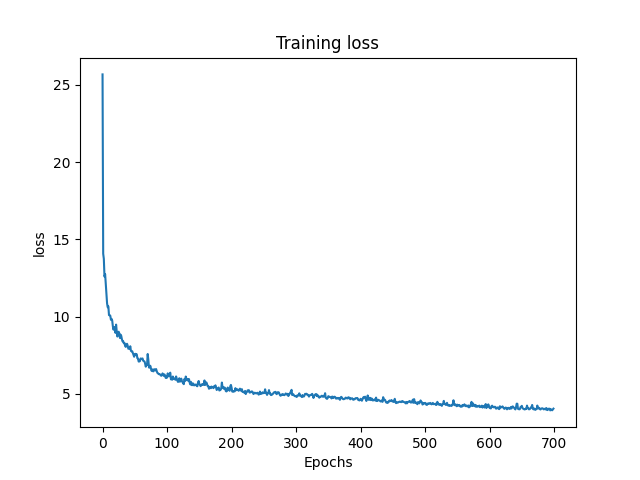

In [5]:
model.fit(train_org_sketches, train_tar_sketches, [], [])

In [6]:
model_config.vis_test = True

[models.py] Tue Sep  7 05:35:45 2021: Saving training visualizations


<IPython.core.display.Javascript object>


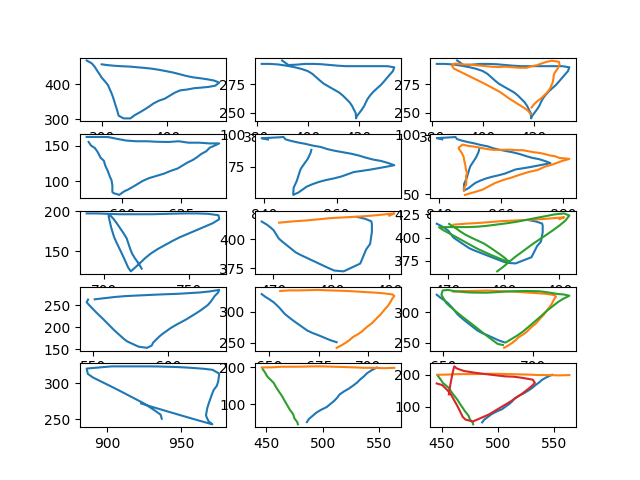

0.2561576354679803
0.5555555555555556
0.6371341064766254
0.7028974926819941
1.7555555555555555


<IPython.core.display.Javascript object>


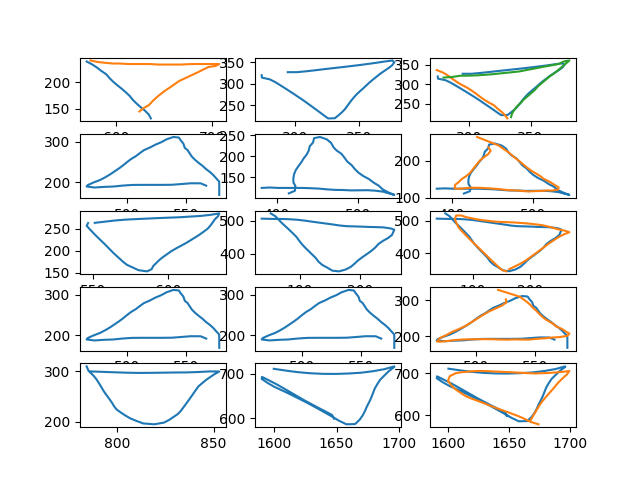

0.9672787452090622
1.12885951444638
1.659090909090908
1.0
1.1334313229168007


<IPython.core.display.Javascript object>


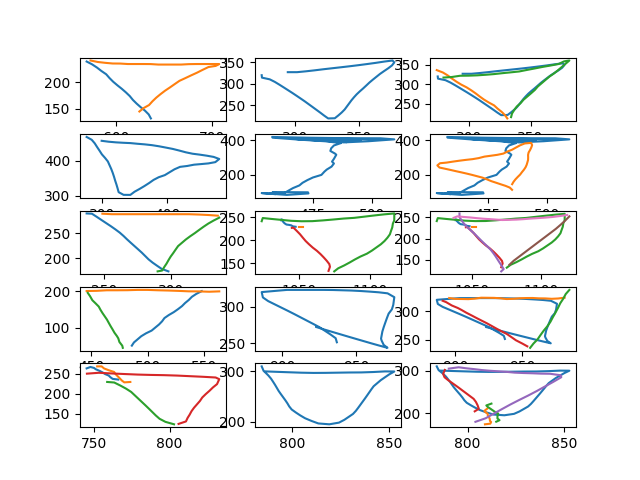

0.9672787452090622
1.6599455680510098
1.0906731446763616
0.569620253164557
0.7928633956277379


<IPython.core.display.Javascript object>


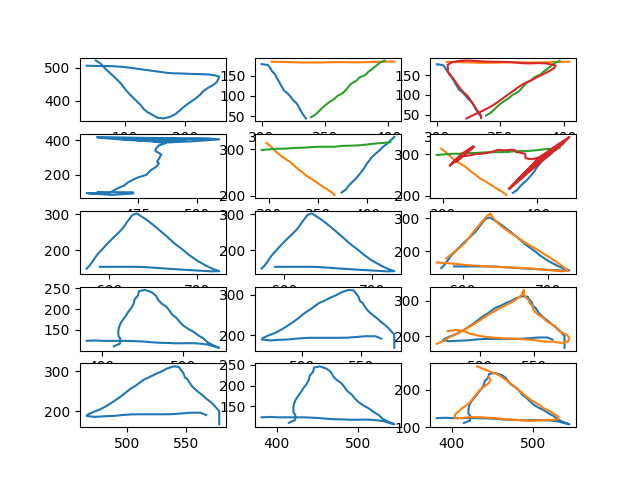

0.6483412329056406
0.3992721346962504
1.0
0.885849822057286
1.12885951444638


<IPython.core.display.Javascript object>


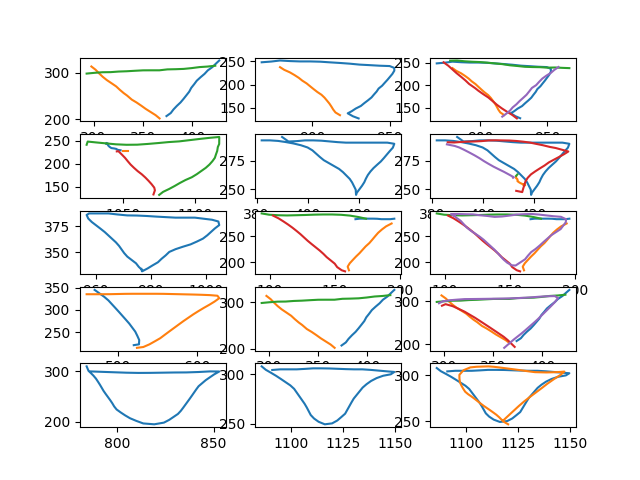

0.9290757534330751
0.4126984126984127
2.018181818181818
0.8036905436997426
0.5534821358066655
[models.py] Tue Sep  7 05:35:51 2021: Saving training visualizations
[226, 343, 294, 298, 289]


<IPython.core.display.Javascript object>


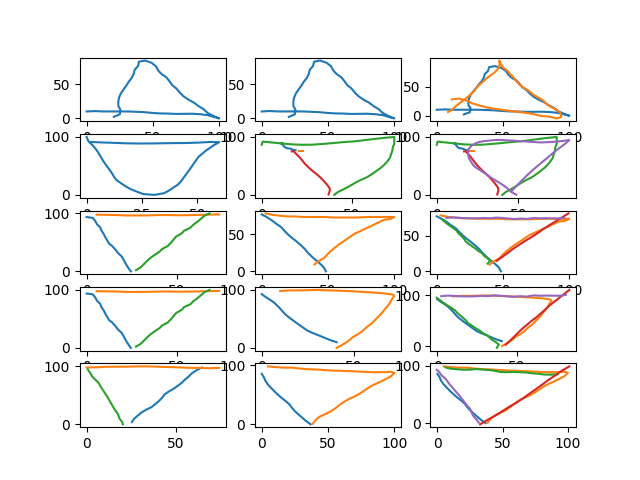

[187, 289, 291, 431, 359]


<IPython.core.display.Javascript object>


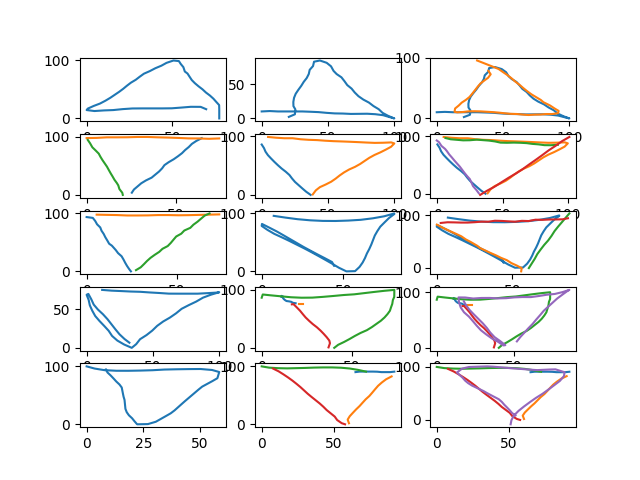

[389, 353, 375, 278, 160]


<IPython.core.display.Javascript object>


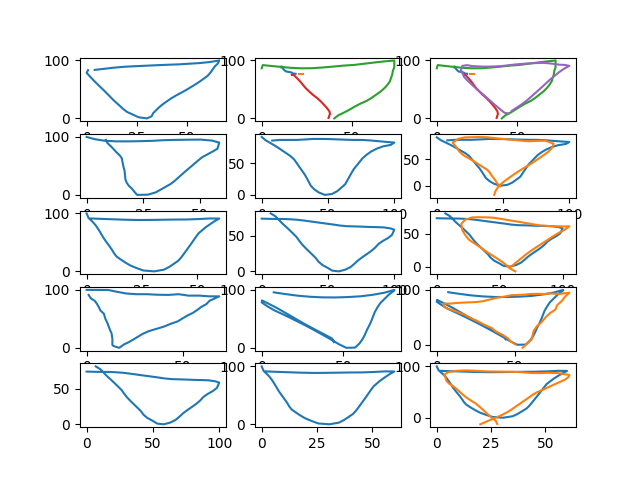

[121, 325, 402, 250, 69]


<IPython.core.display.Javascript object>


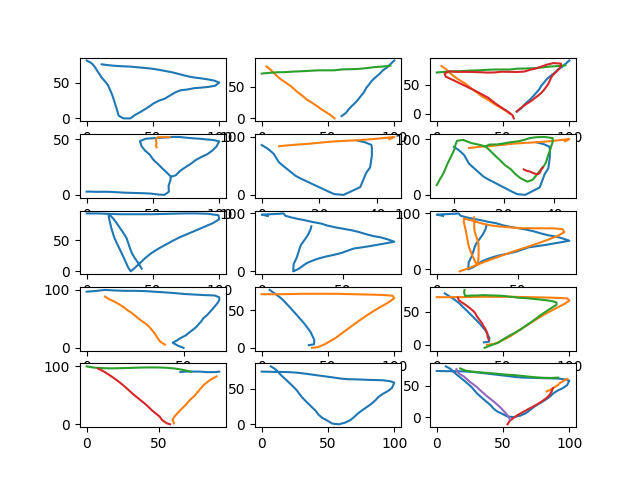

[383, 222, 214, 20, 234]


<IPython.core.display.Javascript object>


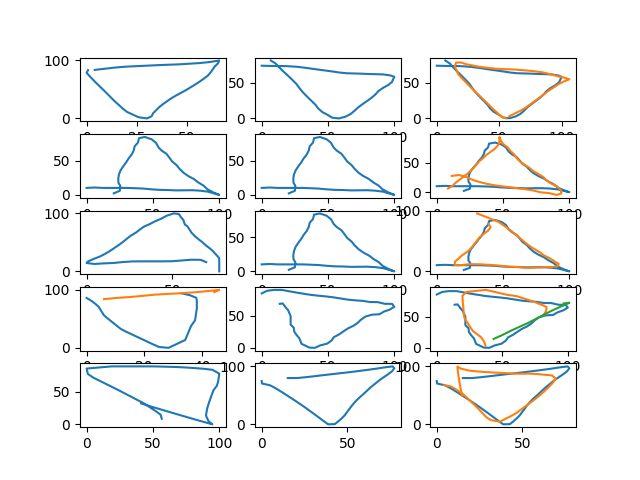

[models.py] Tue Sep  7 05:35:56 2021: Saving training visualizations
[342, 194, 163, 302, 9]


<IPython.core.display.Javascript object>


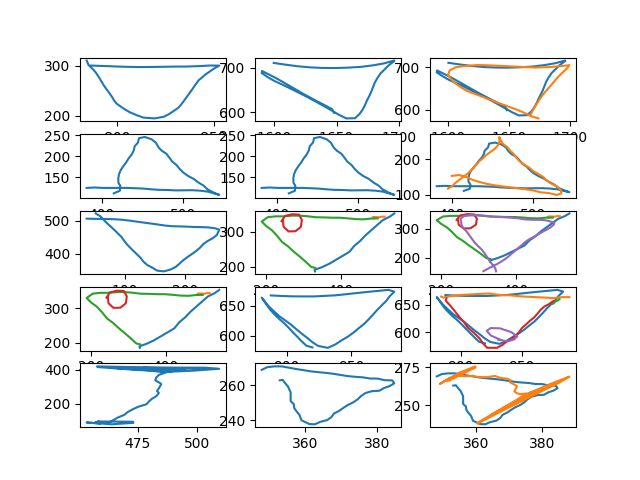

1.1334313229168007
1.0
1.6275009049454146
0.28966878118058614
0.10875912074246147
[233, 435, 317, 184, 316]


<IPython.core.display.Javascript object>


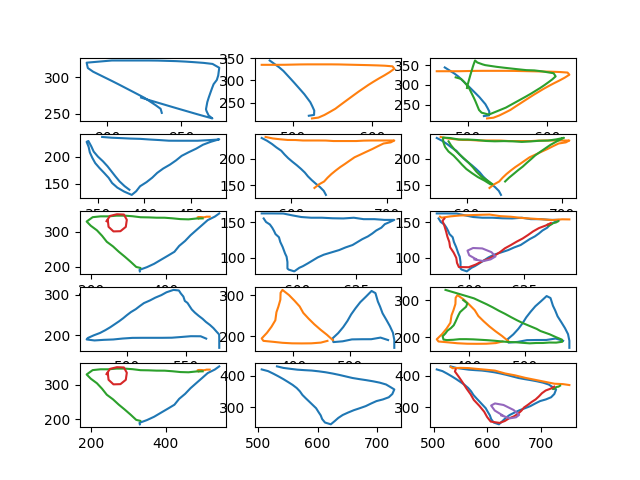

1.8600624218013284
0.9709261033451388
0.22725825378944128
1.620006739290806
0.6256616122845112
[278, 96, 95, 407, 123]


<IPython.core.display.Javascript object>


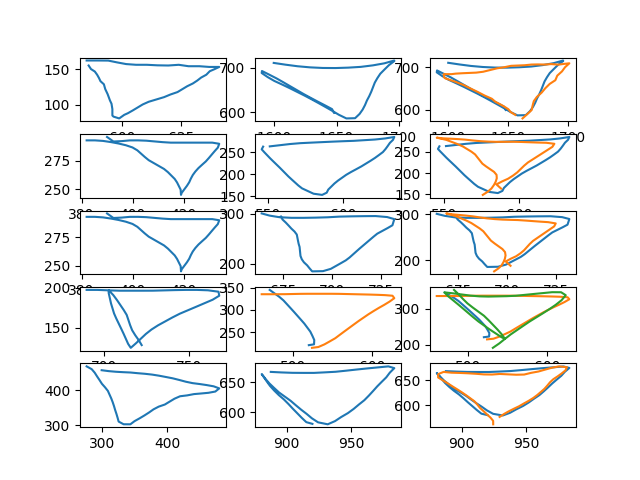

1.6091926189559516
2.5384615384615383
2.23177740037156
2.1485314188935503
0.5085937367870873
[34, 382, 240, 169, 235]


<IPython.core.display.Javascript object>


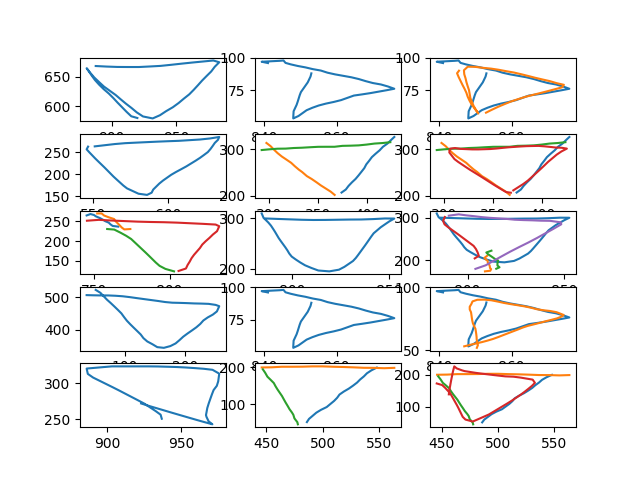

0.43585844813517716
1.019259940290661
0.7928633956277379
0.20547945205479465
1.7555555555555555
[338, 77, 300, 328, 374]


<IPython.core.display.Javascript object>


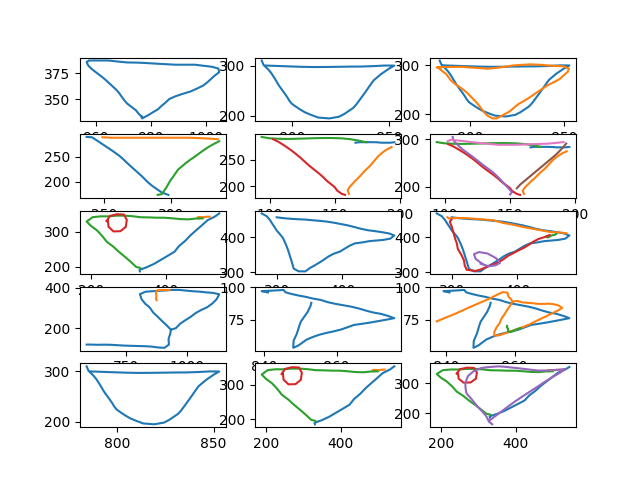

2.090909090909091
0.9608311036434615
0.5695484632006985
0.08245267104475314
3.0993278102873525
[model.py] resulted average loss without refinment 7.826531630583461
[models.py] Tue Sep  7 05:36:02 2021: Saving testing visualizations


<IPython.core.display.Javascript object>


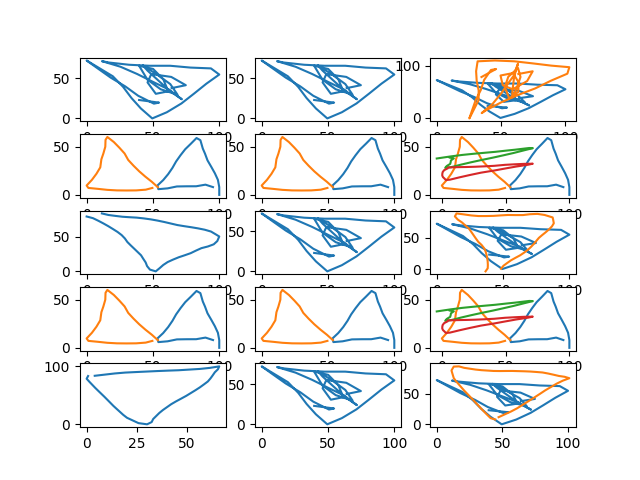

<IPython.core.display.Javascript object>


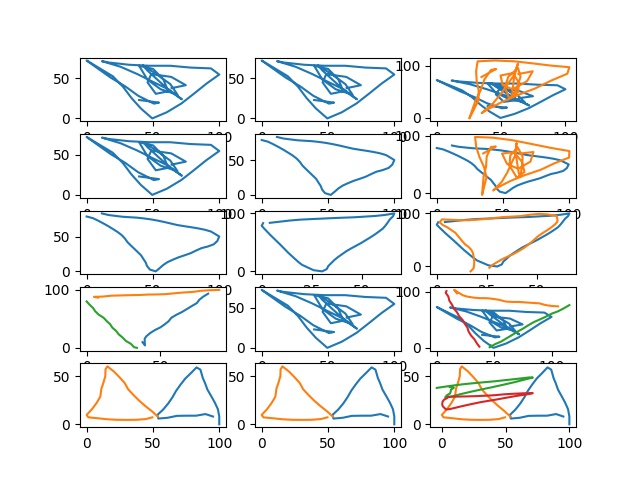

<IPython.core.display.Javascript object>


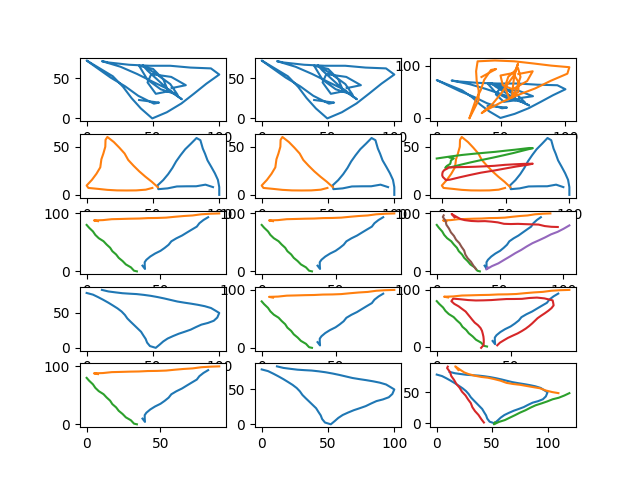

<IPython.core.display.Javascript object>


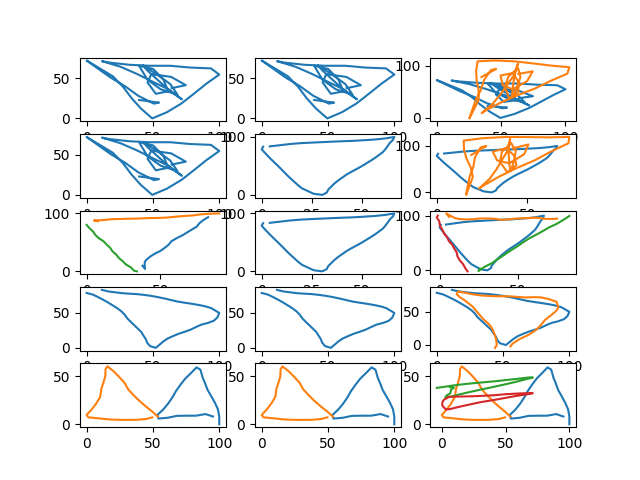

<IPython.core.display.Javascript object>


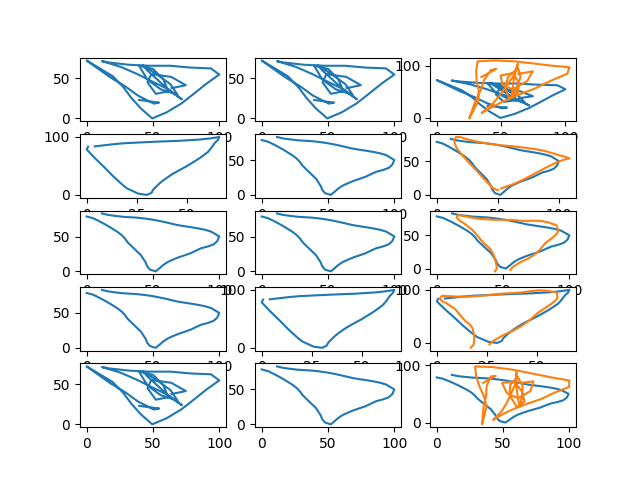

In [7]:
model_visualizer.visualize_model(model, train_org_sketches, train_tar_sketches, val_org_sketches, val_tar_sketches, model_config)

In [37]:
params, losses = model.predict(train_org_sketches[10:20], train_tar_sketches[10:20])

params, losses

(array([[ 8.9890581e-01, -9.9310619e-01,  6.2935072e-01,  2.3375060e-02,
          4.3648928e-01, -1.6510015e+01,  5.1892128e+01],
        [ 7.6045257e-01, -1.3477141e+00,  8.8337100e-01,  8.7212771e-05,
         -6.9919981e-02, -1.6357306e+01,  5.3866585e+01],
        [ 8.8799721e-01, -1.0052931e+00,  6.1143726e-01,  1.8641315e-03,
          5.6095099e-01, -1.5318944e+01,  4.9132969e+01],
        [ 5.8221757e-01, -3.0121717e-01,  4.5290890e-01,  3.2531742e-02,
          1.4874071e+00, -5.9818349e+00,  2.0874294e+01],
        [ 7.6045257e-01, -1.3477141e+00,  8.8337100e-01,  8.7212771e-05,
         -6.9919981e-02, -1.6357306e+01,  5.3866585e+01],
        [ 1.0183887e+00, -1.1910228e+00,  7.1687132e-01, -2.4161525e-03,
          2.2889833e-01, -1.8204432e+01,  5.6887840e+01],
        [ 9.6898615e-01, -1.1806074e+00,  8.4873503e-01,  9.7502135e-03,
          2.5693554e-01, -1.7338560e+01,  5.5340275e+01],
        [ 8.7583596e-01, -1.0162140e+00,  6.4831907e-01, -1.2502197e-02,
          

In [86]:
c = 10
org_obj, tar_obj = train_org_sketches[c].get_copy(), train_tar_sketches[c].get_copy()

In [87]:
params, losses = model.predict([org_obj], [tar_obj])

params, losses

([array([-0.91387734,  1.32640317,  0.75899285,  0.        , -0.31822282,
          0.82576209, -0.43109435])],
 array([60.56503846]))

<IPython.core.display.Javascript object>


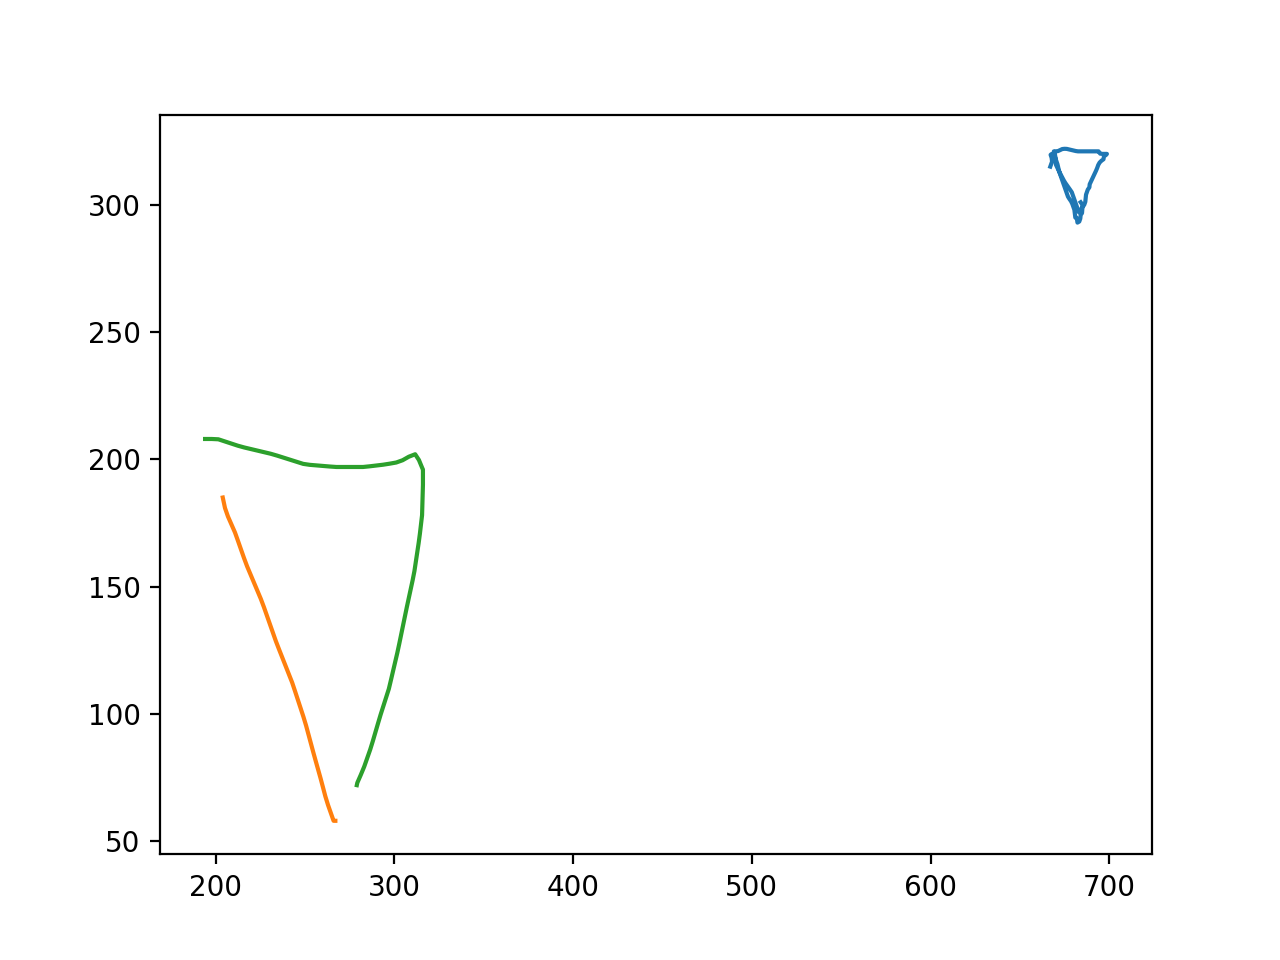

In [88]:
fig2, ax2 = plt.subplots()
org_obj.visualize(show=False, ax=ax2)
tar_obj.visualize(show=False, ax=ax2)

In [89]:
len(org_obj), len(tar_obj)

(111, 111)

In [95]:
params, losses = model.predict([org_obj], [tar_obj])

In [96]:
params, losses

([array([ 0.80106333,  1.03317476,  0.06566752,  0.        , -0.03306611,
          4.34989786,  1.46289754])],
 array([46.90669943]))

In [97]:
RegistrationUtils.obtain_transformation_matrix(params[0])

array([ 0.80107492, -0.06779727,  4.34989786,  0.02613508,  1.03094792,
        1.46289754])

<IPython.core.display.Javascript object>


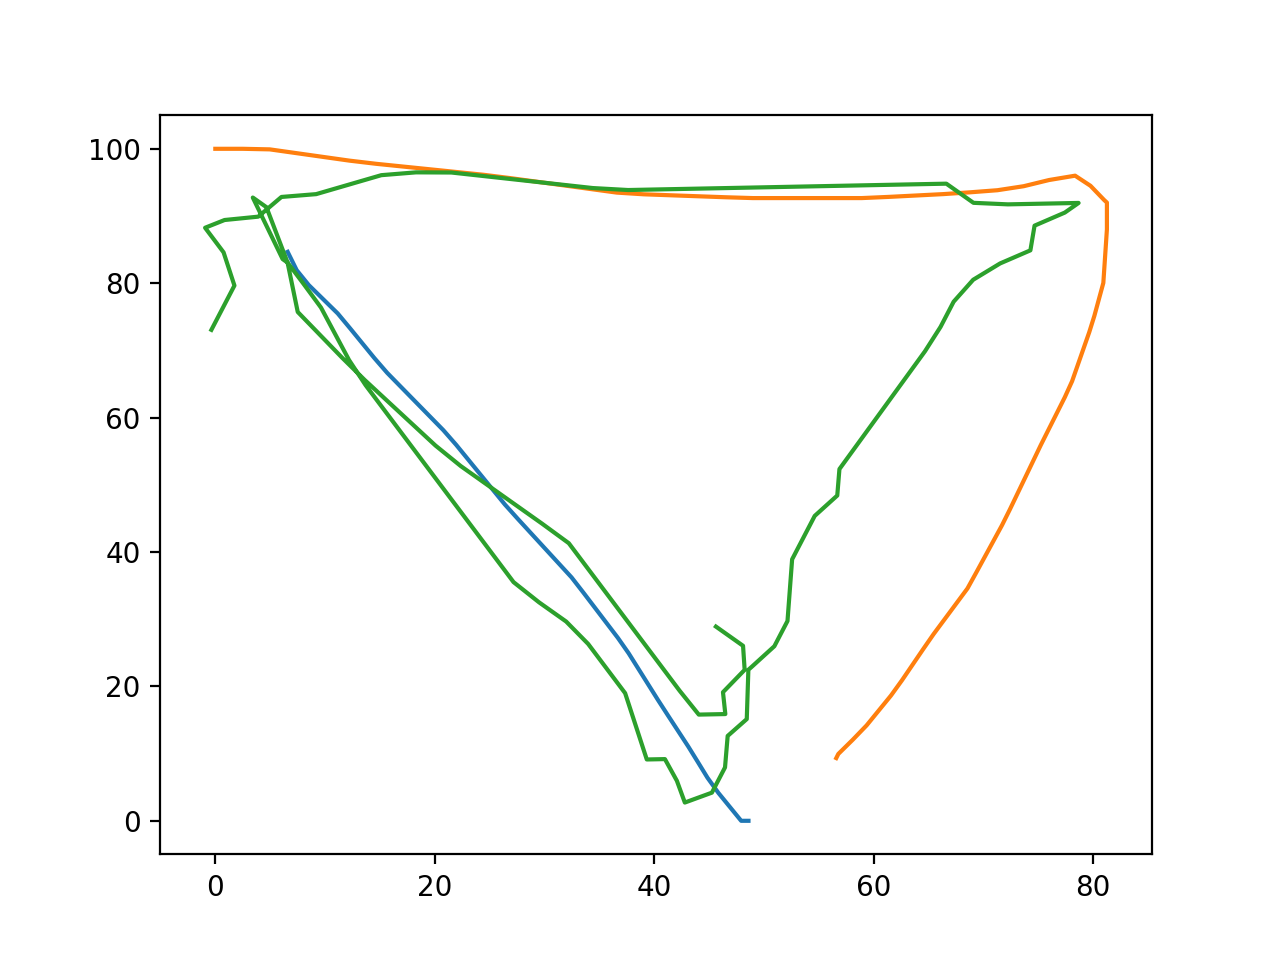

In [98]:
# scale obj1 
tmp = ObjectUtil.poly_to_accumulative_stroke3([org_obj])
tmp = RegistrationUtils.pad_sketches(tmp, maxlen=128)
tmp = np.expand_dims(tmp, axis=-1)
obj1_2 = ObjectUtil.accumalitive_stroke3_to_poly(tmp)[0]

# scale obj2
tmp = ObjectUtil.poly_to_accumulative_stroke3([tar_obj])
tmp = RegistrationUtils.pad_sketches(tmp, maxlen=128)
tmp = np.expand_dims(tmp, axis=-1)
obj2_2 = ObjectUtil.accumalitive_stroke3_to_poly(tmp)[0]

fig2, ax2 = plt.subplots()
# obj1_2.visualize(show=False, ax=ax2)
obj2_2.visualize(show=False, ax=ax2)

p = params[0]
t = RegistrationUtils.obtain_transformation_matrix(p)
obj1_2.transform(t, object_min_origin=False)
obj1_2.visualize(show=False, ax=ax2)

4.734930443718266


<IPython.core.display.Javascript object>


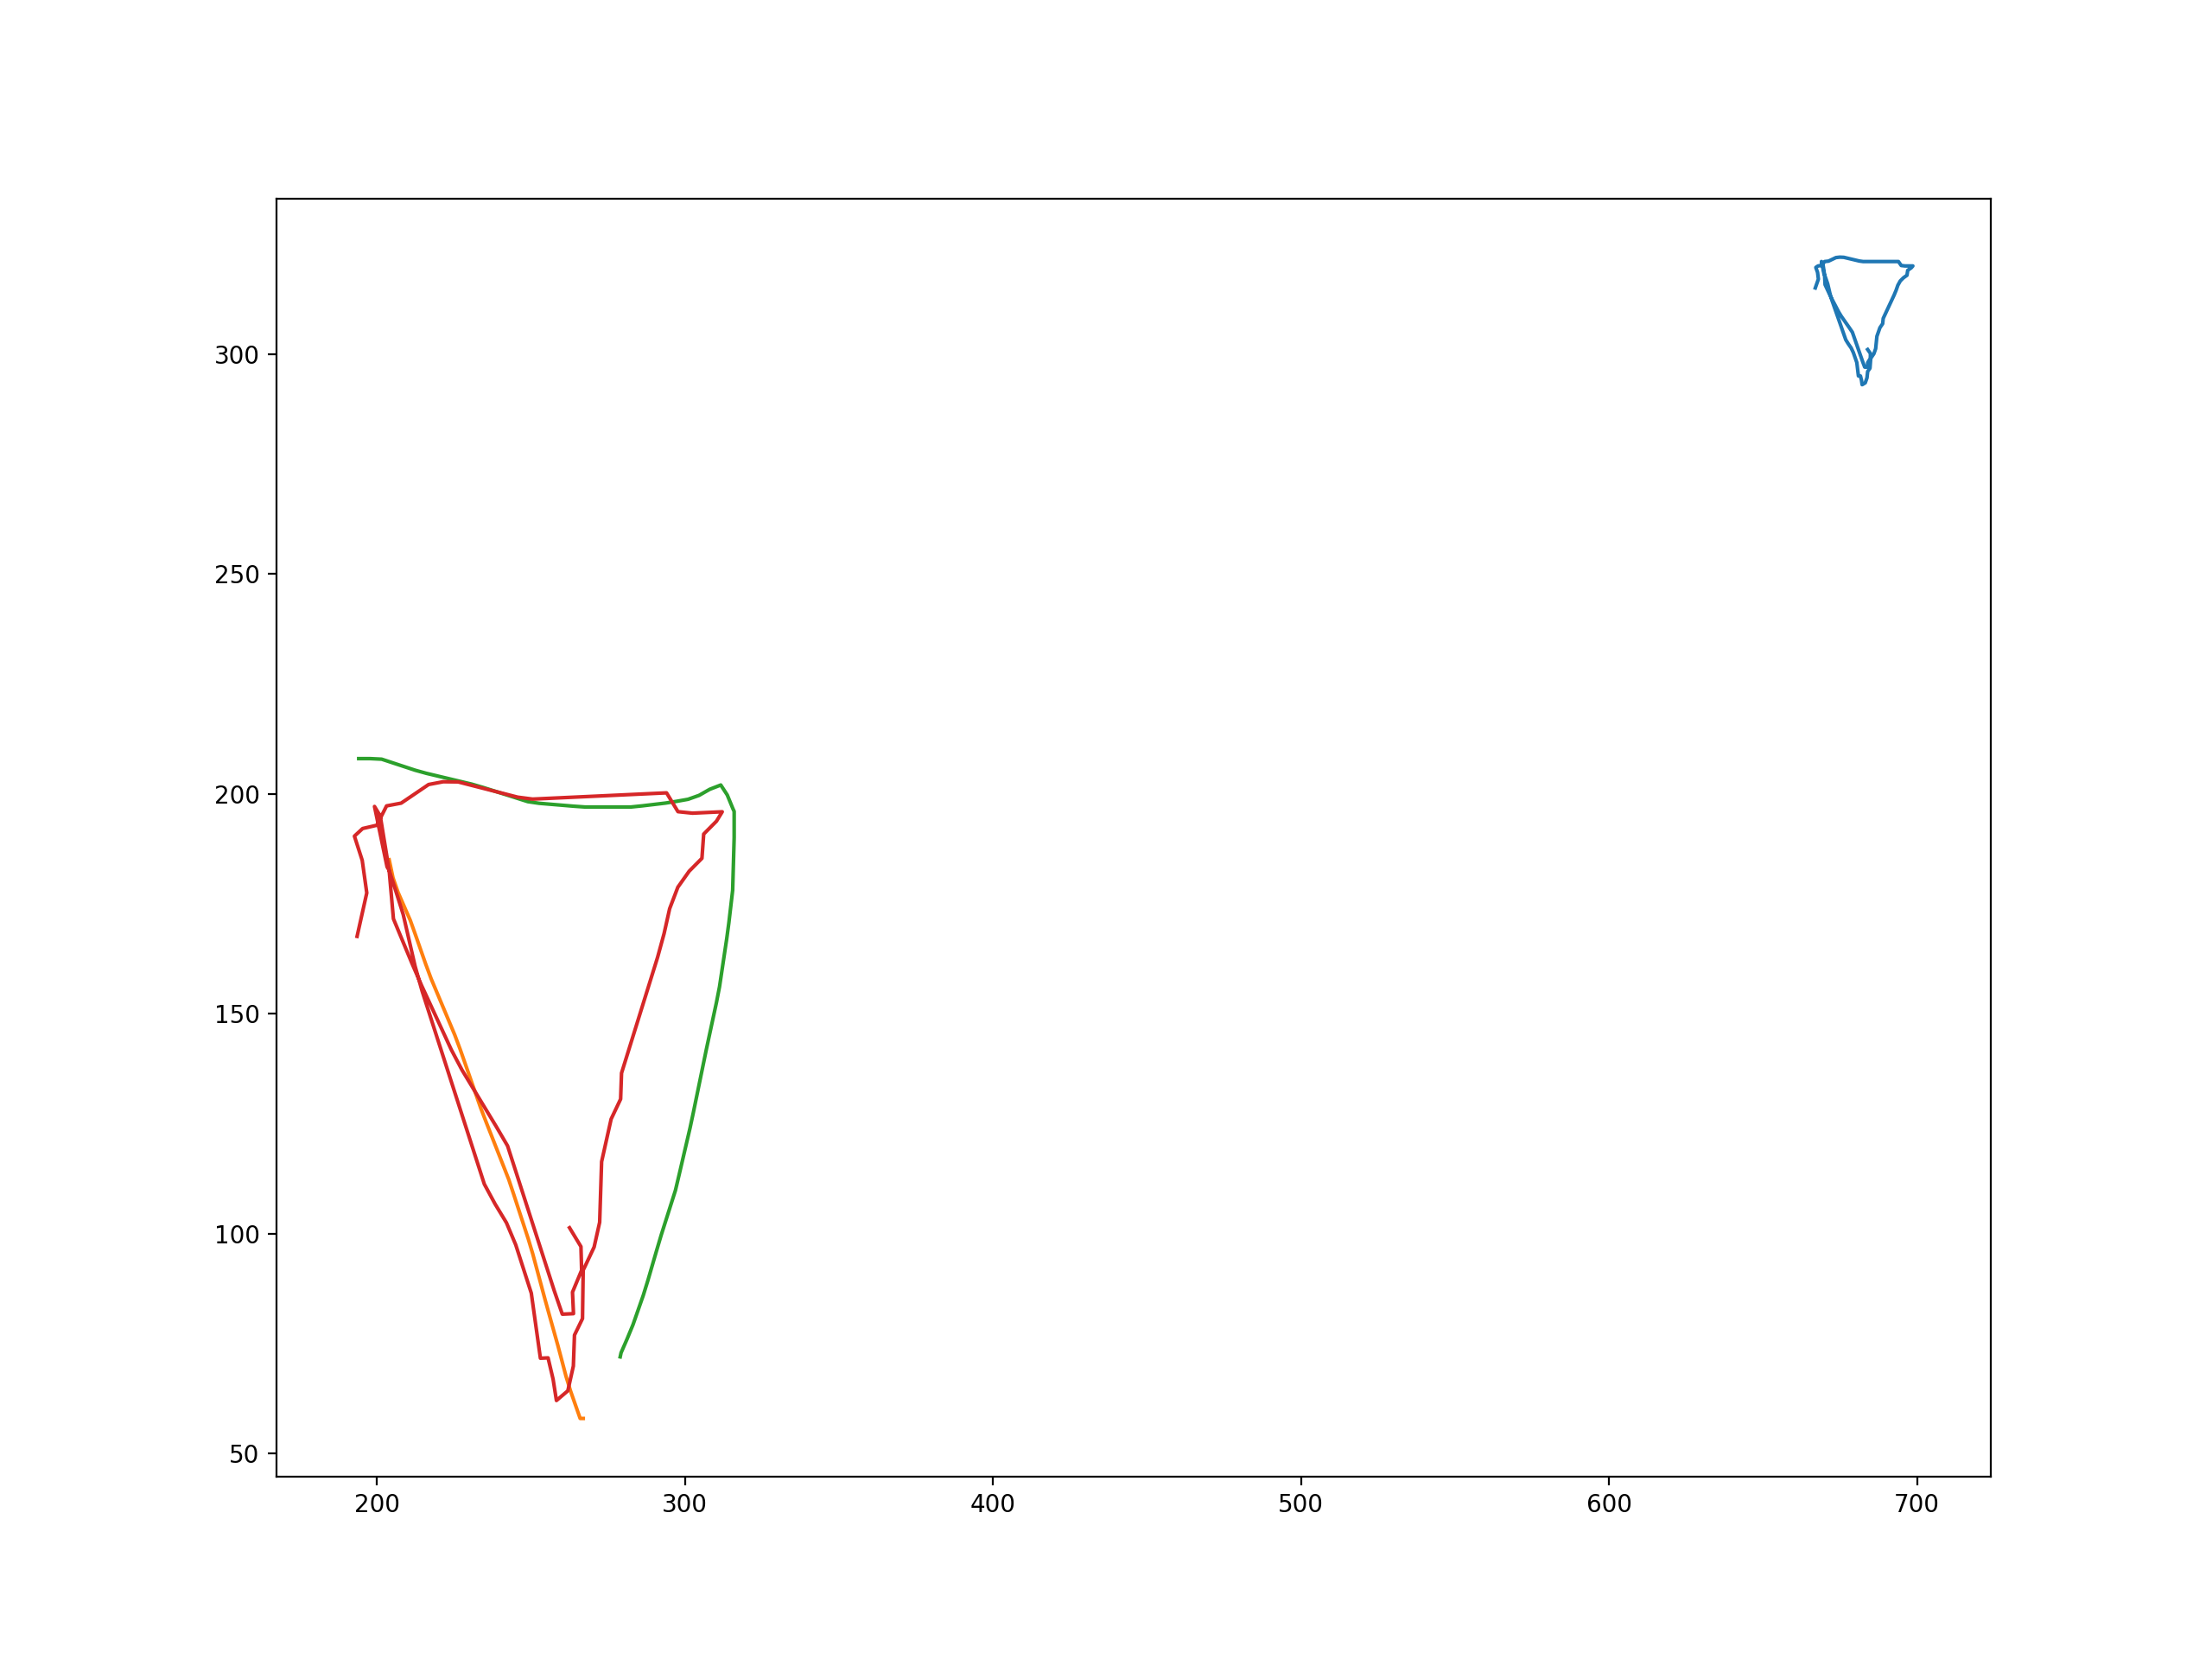

In [99]:
t = RegistrationUtils.obtain_transformation_matrix(params[0])
t_denormalized = ObjectUtil.denormalized_transformation(org_obj, tar_obj, t)

fig2, ax2 = plt.subplots()
org_obj.visualize(show=False, ax=ax2)
tar_obj.visualize(show=False, ax=ax2)
# obj2.transform(t_denormalized)
# obj2.visualize(show=False, ax=ax2)

In [100]:
tmp_obj = org_obj.get_copy()
tmp_obj.transform(t_denormalized, object_min_origin=True)
tmp_obj.visualize(show=False, ax=ax2)

In [101]:
# test sequential 

<IPython.core.display.Javascript object>


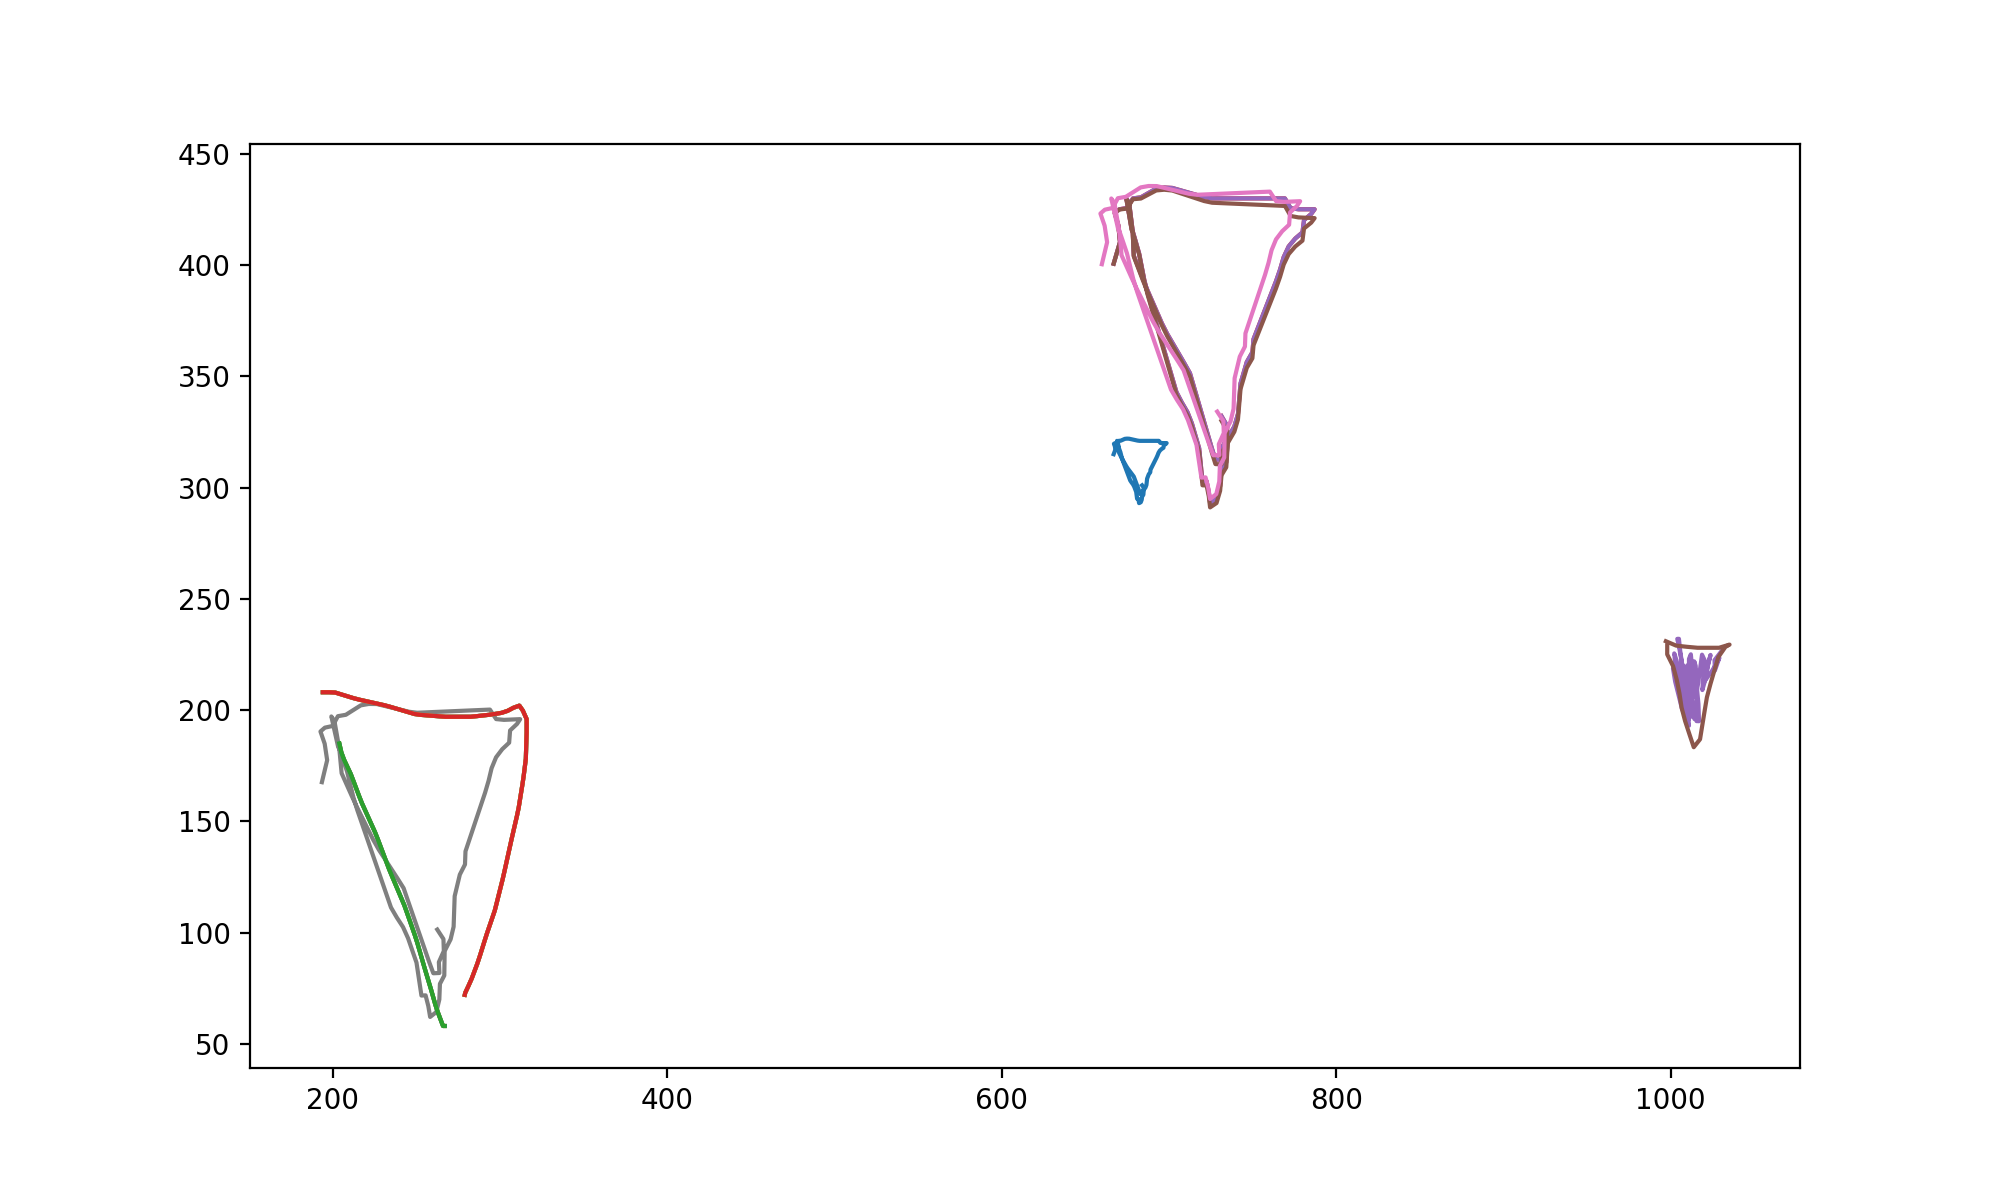

In [102]:
p_decomposed = RegistrationUtils.decompose_tranformation_matrix(t)

obj1_seq = org_obj.get_copy()

p_denormalized = RegistrationUtils.decompose_tranformation_matrix(t_denormalized)

seq_params = RegistrationUtils.get_seq_translation_matrices(p_denormalized)

fig2, ax2 = plt.subplots(figsize=(5, 3))
obj1_seq.visualize(show=False, ax=ax2)
tar_obj.visualize(show=False, ax=ax2)
# obj2.transform(t_denormalized)
# obj2.visualize(show=False, ax=ax2)


In [103]:
i = 0
t1 = [1.0, 0.0, 0.0, 0.0, 1.0, 0.0]

In [108]:
tp = np.zeros(6)
t = seq_params[i]
tp = np.zeros(6)
print(t)
tp[0] = t[0] * t1[0] + t[1] * t1[3]
tp[1] = t[0] * t1[1] + t[1] * t1[4]
tp[2] = t[2] + t1[2]
tp[3] = t[3] * t1[0] + t[4] * t1[3]
tp[4] = t[3] * t1[1] + t[4] * t1[4]
tp[5] = t[5] + t1[5]
t1 = tp
if i == 4:
    obj1_seq.transform(t, object_min_origin=True, retain_origin=False)
else:
    obj1_seq.transform(t, object_min_origin=True, retain_origin=True)
obj1_seq.visualize(show=False, ax=ax2)
i += 1

[1.0, 0.0, 200.63700150688788, 0.0, 1.0, 60.19434630870819]


In [425]:
t1, t_denormalized, RegistrationUtils.obtain_transformation_matrix(p_denormalized) #should all be equal

(array([1.13264117, 0.        , 0.        , 0.        , 0.97677266,
        0.        ]),
 array([ 1.01448609e+00,  2.02437361e-01,  6.59420432e+02, -6.76386062e-01,
         9.55564720e-01,  1.62093794e+02]),
 array([ 1.01448609e+00,  2.02437361e-01,  6.59420432e+02, -6.76386062e-01,
         9.55564720e-01,  1.62093794e+02]))

# animate transformation

<IPython.core.display.Javascript object>


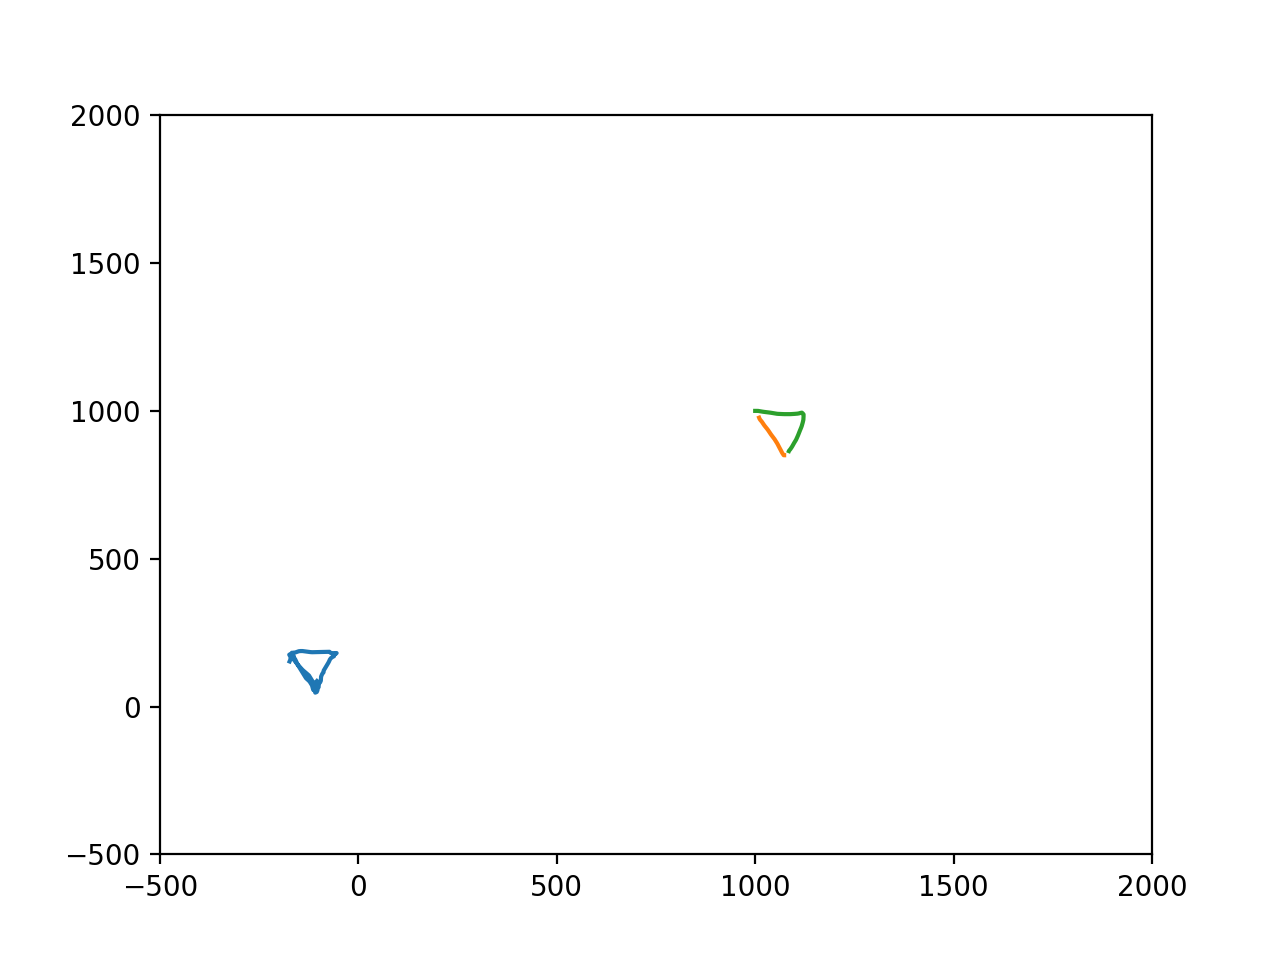

Before [ 0.80106333  1.03317476  0.06566752  0.         -0.03306611  4.34989786
  1.46289754]
4.734930443718266
After [ 3.79297914e+00  4.89201064e+00  6.56675175e-02  0.00000000e+00
 -3.30661112e-02  2.00637002e+02  6.01943463e+01]
Seq Params: [[[3.7929791425232757, 0.0, 0.0, 0.0, 4.892010640567052, 0.0], [1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, -0.033066111182582666, 1.0, 0.0], [0.9978446632651794, -0.0656203321631389, 0.0, 0.0656203321631389, 0.9978446632651794, 0.0], [1.0, 0.0, 200.63700150688788, 0.0, 1.0, 60.19434630870819]]]
1 1000


In [109]:
obj1_seq = org_obj.get_copy()
pre_org = obj1_seq.get_copy()
pre_tar = tar_obj.get_copy()
animation = SketchAnimation([obj1_seq], [tar_obj.get_copy()]) 
animation.seq_animate_all([params[0]], 
                         denormalize_trans=True,
                         save=False) 

In [427]:
pre_org == org_obj

True

In [279]:
pre_tar == tar_obj

False

In [277]:
org_obj.get_x()

[999.0,
 989.4186667411399,
 973.7562826869724,
 955.1450739043989,
 934.6845353902512,
 913.5011013719775,
 891.9587080198952,
 869.8733613217433,
 847.7880146235916,
 825.6240047144291,
 803.2627786014724,
 780.9015524885157,
 758.5403263755591,
 736.1549029308308,
 713.652065667553,
 691.1438470467804,
 668.598531525285,
 646.0579987533879,
 623.5680712970095,
 601.078143840631,
 578.6053392371374,
 556.3881814282665,
 534.1710236193956,
 512.1558118672833,
 490.1421667184246,
 468.716568882973,
 447.323151234108,
 426.48367756501966,
 405.6620057734013,
 385.3892068681654,
 365.21557852957307,
 346.01013652291994,
 326.80469451626675,
 308.1037128723028,
 290.20737974321474,
 272.828499948976,
 255.8282467228422,
 239.88253467820698,
 224.3063019069433,
 209.01064997494223,
 195.47903552340455,
 181.94865018227304,
 170.8634792100665,
 163.19745644421528,
 159.61559864096367,
 161.86329330826499,
 171.17120105730046,
 183.68004673018146,
 198.58959381762637,
 215.80797336020927,
 2

In [255]:
pre_org.get_x()

[1921.7037817506134,
 1894.2259280509961,
 1872.087203778479,
 1854.3166679865408,
 1840.8885662420412,
 1829.9194201472114,
 1820.3228753410558,
 1813.485590561055,
 1806.6483057810542,
 1800.440242590793,
 1795.8096981882777,
 1791.1791537857625,
 1786.5486093832474,
 1782.2516593620155,
 1779.5734245992635,
 1777.0622274995985,
 1775.7025204487577,
 1774.5929187631014,
 1776.1296318506418,
 1777.6663449381824,
 1779.390928300124,
 1783.9204433973791,
 1788.4499584946343,
 1794.3632150290987,
 1800.287205983796,
 1809.0960888332636,
 1818.062843944605,
 1829.0496743681656,
 1840.0956728695267,
 1852.8041039850552,
 1865.759273454423,
 1881.1233098874266,
 1896.4873463204297,
 1912.856545651793,
 1930.8290480237795,
 1949.6819042606442,
 1969.1443826660159,
 1990.1818912011329,
 2011.7101796755483,
 2033.611164149947,
 2057.5505838129798,
 2081.4914237757116,
 2107.5849203737384,
 2135.74408002612,
 2165.560690401916,
 2195.3806842759186,
 2223.191169614561,
 2248.9140019559304,
 2271

<IPython.core.display.Javascript object>


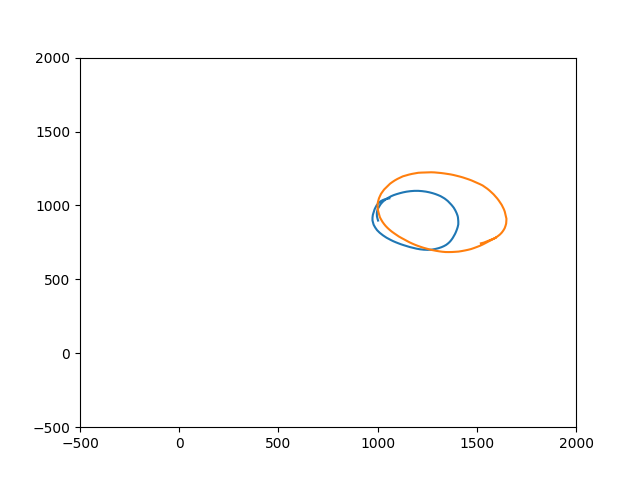

Before [ 0.6164669  -1.3186553   1.5930966   0.06658266  0.01791772 -2.6899564
  1.3900946 ]
0.6813139072710953
After [-4.20007452e-01  8.98418113e-01 -1.54849604e+00  0.00000000e+00
  1.79177151e-02  9.82529896e+02  6.93600177e+02]
Seq Params: [[[-0.42000745237595194, 0.0, 0.0, 0.0, 0.8984181127538624, 0.0], [1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.017917715057904692, 1.0, 0.0], [0.022298439604735022, 0.9997513588843948, 0.0, -0.9997513588843948, 0.022298439604735022, 0.0], [1.0, 0.0, 982.5298961476709, 0.0, 1.0, 693.6001771655157]]]
1 1000


In [306]:
obj1_seq = org_obj.get_copy()
animation = SketchAnimation([obj1_seq], [tar_obj]) 
animation.seq_animate_all([params[0]], 
                         denormalize_trans=True,
                         save=False) 

In [305]:
p_denormalized

array([-4.20007452e-01,  8.98418113e-01, -1.54849604e+00,  0.00000000e+00,
        1.79177151e-02,  1.76586661e+03,  6.18028064e+02])